In [1]:
# Basic settings for pyspark.
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Iteration4_misl938').getOrCreate()

In [2]:
# Import the relevant Python libraries.

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import pyspark.sql.functions as F


In [3]:
# I have installed pip on python to import seaborn

# sudo apt-get install -y python3-dev python3-setuptools
#sudo apt-get update
#sudo apt-get install python3-pip
#pip3 install -U pip
#pip install seaborn --user

import seaborn as sns

In [4]:
# Let's read in the data.
#housing_data = spark.read.csv('Datasets/Melbourne_housing.csv', inferSchema= True, header = True)
housing_data = spark.read.csv('Datasets/Melbourne_housing.csv', header = True,inferSchema=True)

In [5]:
# The show method allows us to visualise DataFrames.
housing_data.show(10)


+----------+------------------+-----+----+-------+------+-------+---------+--------+--------+--------+--------+---+--------+------------+---------+------------------+---------+----------+--------------------+-------------+
|    Suburb|           Address|Rooms|Type|  Price|Method|SellerG|     Date|Distance|Postcode|Bedroom2|Bathroom|Car|Landsize|BuildingArea|YearBuilt|       CouncilArea|Lattitude|Longtitude|          Regionname|Propertycount|
+----------+------------------+-----+----+-------+------+-------+---------+--------+--------+--------+--------+---+--------+------------+---------+------------------+---------+----------+--------------------+-------------+
|Abbotsford|     68 Studley St|    2|   h|   null|    SS| Jellis|3/09/2016|     2.5|    3067|       2|       1|  1|     126|        null|     null|Yarra City Council| -37.8014|  144.9958|Northern Metropol...|         4019|
|Abbotsford|      85 Turner St|    2|   h|1480000|     S| Biggin|3/12/2016|     2.5|    3067|       2|      

In [169]:
# Let's have a better view of the 20 rows of dataset
housing_data.limit(10).toPandas()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067,...,1,1,126,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,...,1,1,202,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,...,1,0,156,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067,...,2,1,0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067,...,2,0,134,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067,...,2,1,94,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067,...,1,2,120,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067,...,2,2,400,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067,...,1,2,201,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067,...,2,1,202,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019


In [8]:
# Let's have a look at the column names. 
columns = housing_data.columns
columns


['Suburb',
 'Address',
 'Rooms',
 'Type',
 'Price',
 'Method',
 'SellerG',
 'Date',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount']

In [7]:
# number of rows/entry in the dataset
housing_data.count()

34857

In [14]:
# First row of the dataset
housing_data.head()

Row(Suburb='Abbotsford', Address='68 Studley St', Rooms=2, Type='h', Price=None, Method='SS', SellerG='Jellis', Date='3/09/2016', Distance=2.5, Postcode=3067, Bedroom2=2, Bathroom=1, Car=1, Landsize=126, BuildingArea=None, YearBuilt=None, CouncilArea='Yarra City Council', Lattitude=-37.8014, Longtitude=144.9958, Regionname='Northern Metropolitan', Propertycount=4019)

In [15]:
# A simple for loop allows us to make it even clearer. 
for item in housing_data.head():
    print(item)

Abbotsford
68 Studley St
2
h
None
SS
Jellis
3/09/2016
2.5
3067
2
1
1
126
None
None
Yarra City Council
-37.8014
144.9958
Northern Metropolitan
4019


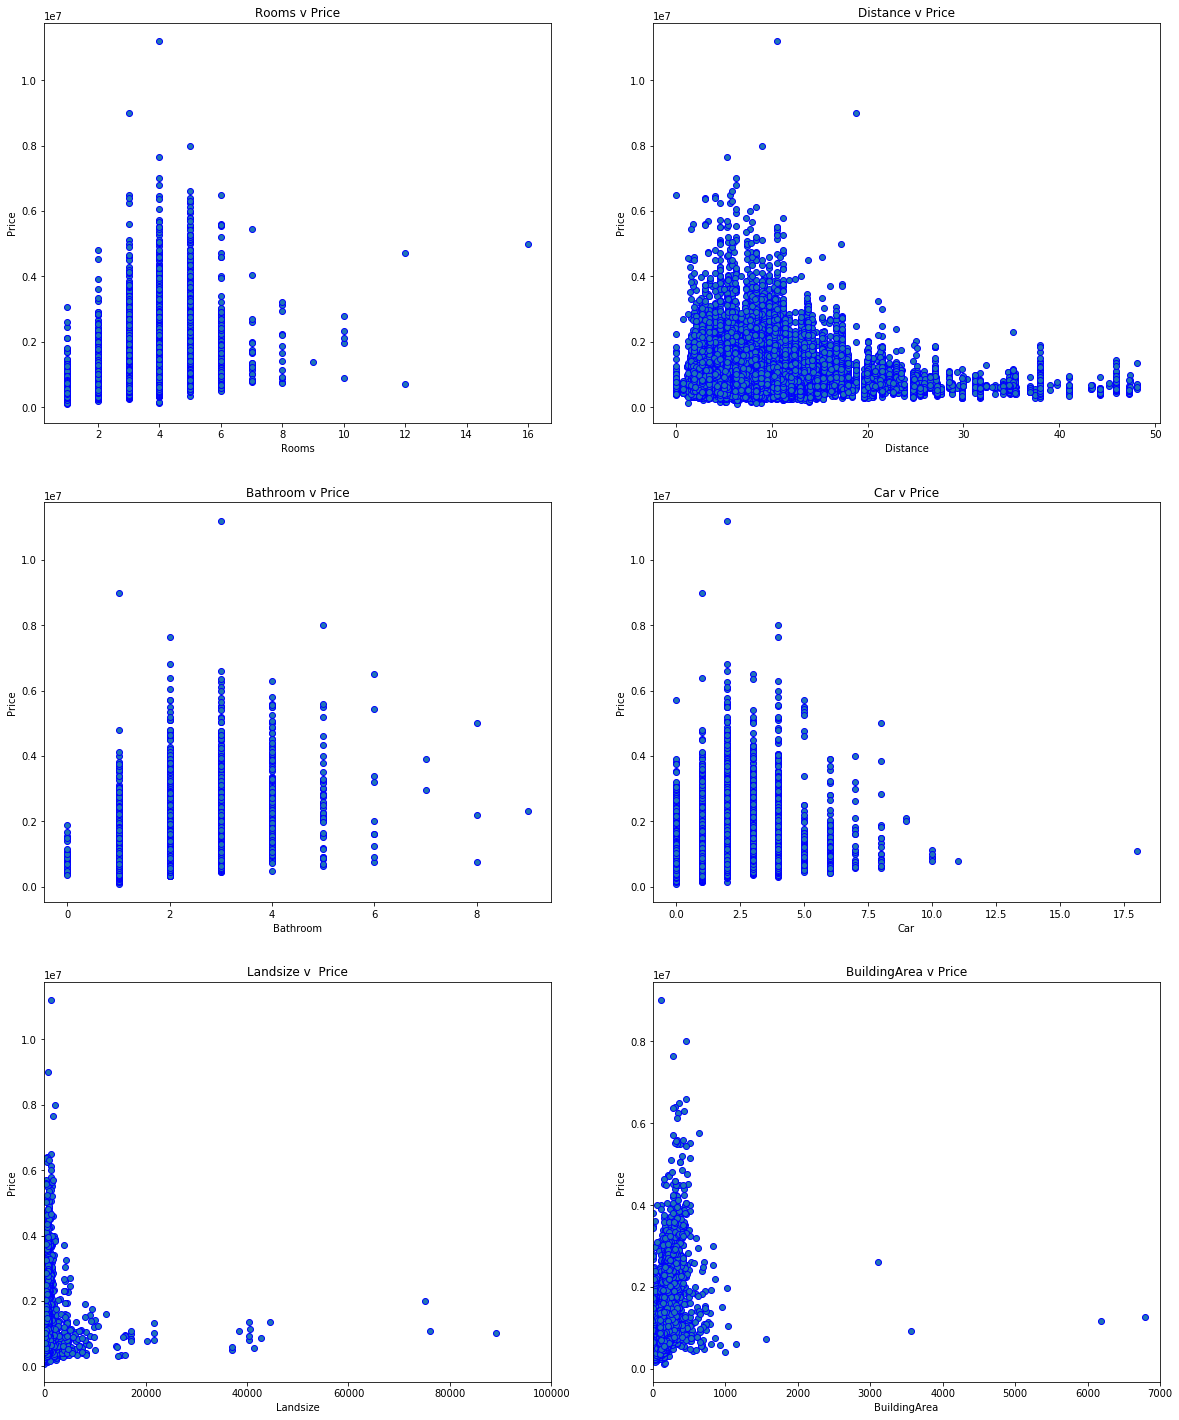

In [10]:
# numeric features vs price

f, axes = plt.subplots(3,2, figsize = (20,25))

PriceArr = np.array(housing_data.select('Price').collect())
RoomsArr = np.array(housing_data.select('Rooms').collect())
DistanceArr = np.array(housing_data.select('Distance').collect())
BathroomArr = np.array(housing_data.select('Bathroom').collect())
CarArr = np.array(housing_data.select('Car').collect())
LandsizeArr = np.array(housing_data.select('Landsize').collect())
BuildingAreaArr = np.array(housing_data.select('BuildingArea').collect())

# Plot [0,0]
axes[0,0].scatter(RoomsArr,PriceArr, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')

# Plot [0,1]
axes[0,1].scatter(DistanceArr, PriceArr,  edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance v Price')

# Plot [1,0]
axes[1,0].scatter(BathroomArr,PriceArr,  edgecolor = 'b')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom v Price')

# Plot [1,1]
axes[1,1].scatter(CarArr, PriceArr,  edgecolor = 'b')
axes[1,1].set_xlabel('Car')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Car v Price')

# Plot [2,0]
axes[2,0].scatter(LandsizeArr, PriceArr,  edgecolor = 'b')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')
axes[2,0].set_xlim([0, 100000])
axes[2,0].set_title('Landsize v  Price')

# Plot [2,1]
axes[2,1].scatter(BuildingAreaArr, PriceArr, edgecolor = 'b')
axes[2,1].set_xlabel('BuildingArea')
axes[2,1].set_ylabel('Price')
axes[2,1].set_xlim([0, 7000])
axes[2,1].set_title('BuildingArea v Price')



plt.show()

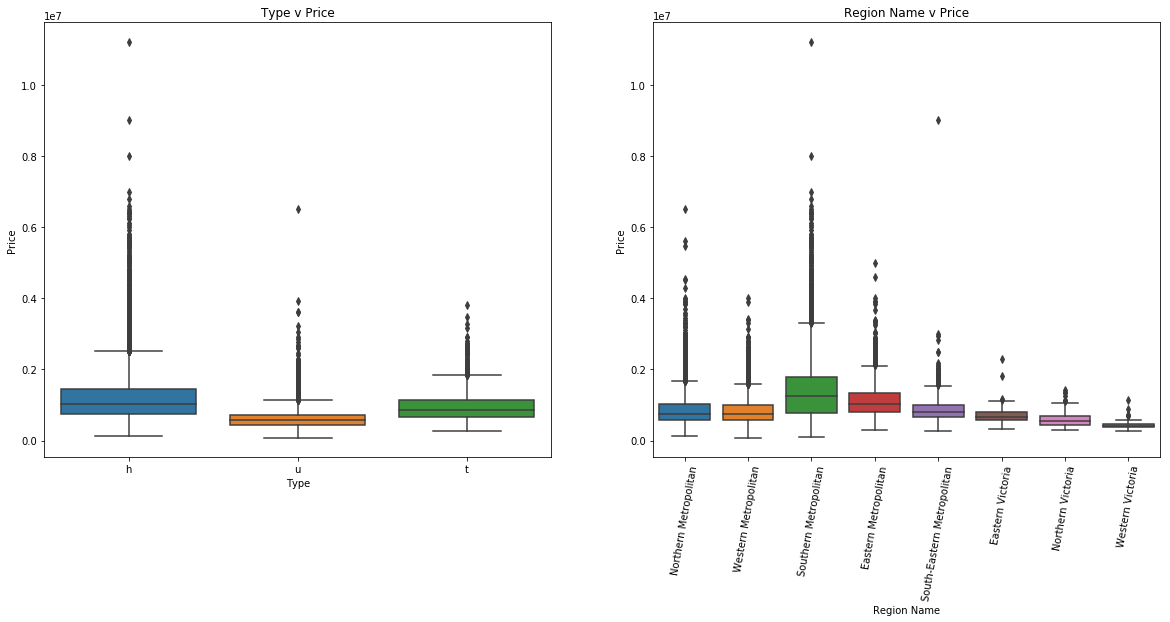

In [11]:
# categorical features v price


#used toPandas() without sample as the dataset is small. For big data I can use smaller sample
#data_plot= housing_data.select('Price','Type','Regionname')..sample(False,0.1).toPandas()
data_plot= housing_data.select('Price','Type','Regionname').sample(False, 0.95).toPandas()



f, axes = plt.subplots(1,2, figsize = (20,8))
labels=(data_plot['Regionname'].unique()).tolist()



# Plot [0]
sns.boxplot( x = 'Type', y = 'Price',data = data_plot, ax = axes[0])
axes[0].set_xlabel('Type')
axes[0].set_ylabel('Price')
axes[0].set_title('Type v Price')

# Plot [1]
sns.boxplot(x = 'Regionname', y = 'Price', data = data_plot, ax = axes[1])
axes[1].set_xticklabels(labels, rotation=80)
axes[1].set_xlabel('Region Name')
axes[1].set_ylabel('Price')
axes[1].set_title('Region Name v Price')


plt.show()

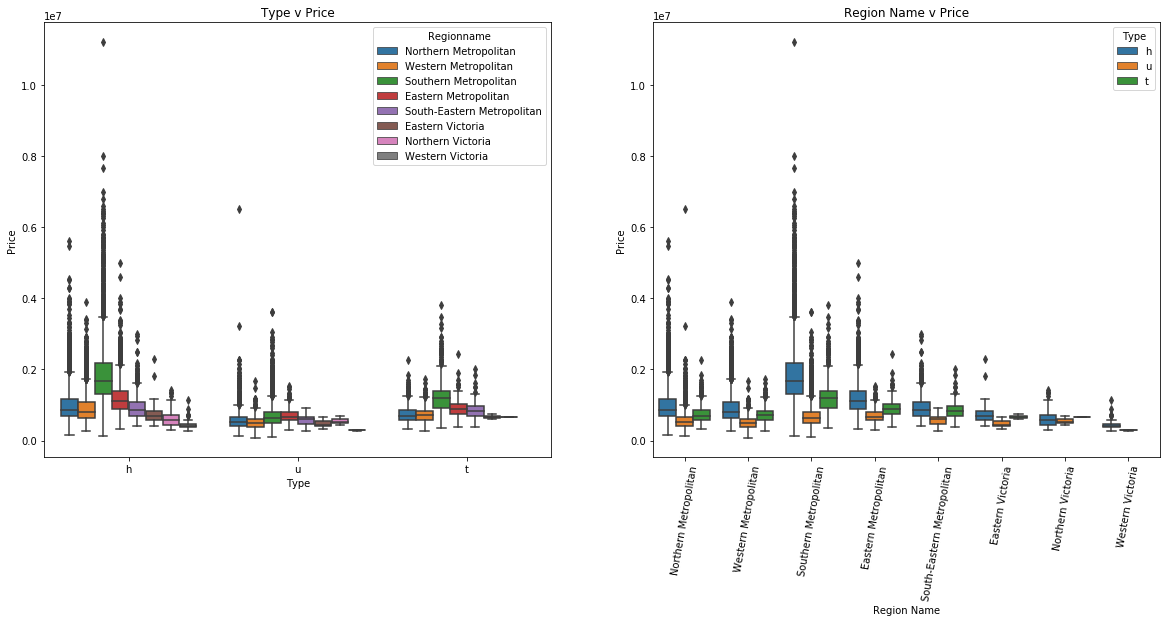

In [12]:
# categorical features v price


#used toPandas() without sample as the dataset is small. For big data I can use smaller sample
#data_plot= housing_data.select('Price','Type','Regionname')..sample(False,0.1).toPandas()
data_plot= housing_data.select('Price','Type','Regionname').sample(False, 0.95).toPandas()



f, axes = plt.subplots(1,2, figsize = (20,8))
labels=(data_plot['Regionname'].unique()).tolist()



# Plot [0]
sns.boxplot( x = 'Type', y = 'Price',data = data_plot,hue ='Regionname', ax = axes[0])
axes[0].set_xlabel('Type')
axes[0].set_ylabel('Price')
axes[0].set_title('Type v Price')

# Plot [1]
sns.boxplot(x = 'Regionname', y = 'Price', data = data_plot,hue ='Type', ax = axes[1])
axes[1].set_xticklabels(labels, rotation=80)
axes[1].set_xlabel('Region Name')
axes[1].set_ylabel('Price')
axes[1].set_title('Region Name v Price')




plt.show()

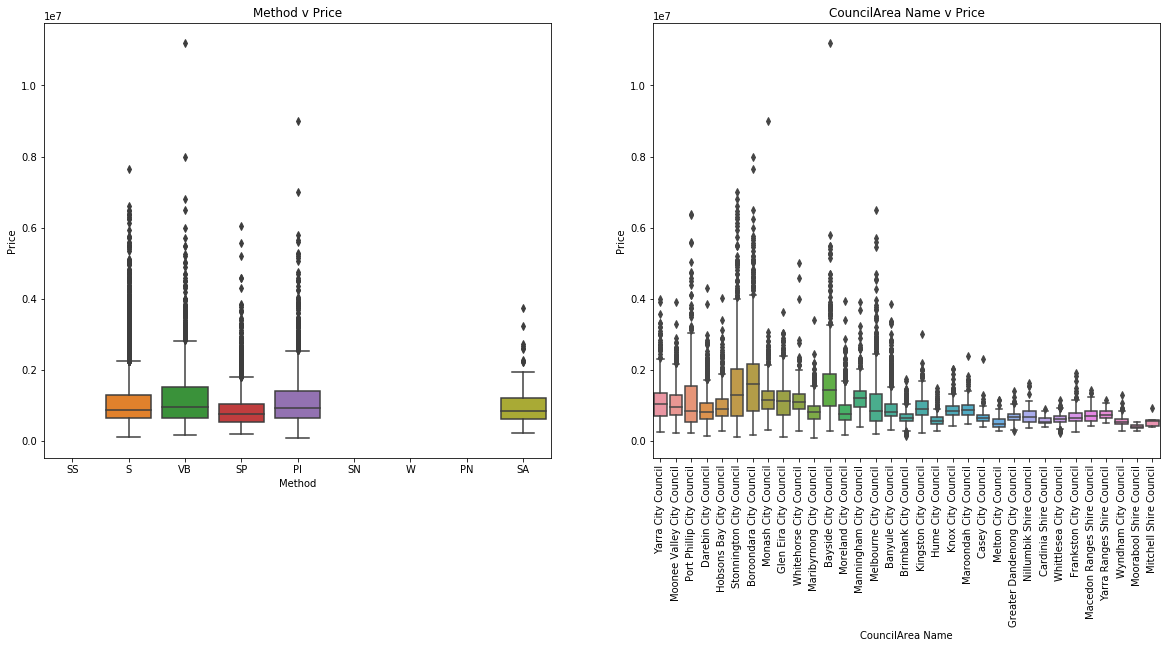

In [13]:
# categorical features v price


#used toPandas() without sample as the dataset is small. For big data I can use smaller sample
#data_plot= housing_data.select('Price','CouncilArea','Method')..sample(False,0.1).toPandas()
data_plot= housing_data.select('Price','CouncilArea','Method').sample(False, 0.95).toPandas()



f, axes = plt.subplots(1,2, figsize = (20,8))
labels=(data_plot['CouncilArea'].unique()).tolist()




# Plot [0]
sns.boxplot( x = 'Method', y = 'Price',data = data_plot, ax = axes[0])
axes[0].set_xlabel('Method')
axes[0].set_ylabel('Price')
axes[0].set_title('Method v Price')

# Plot [1]
sns.boxplot(x = 'CouncilArea', y = 'Price', data = data_plot, ax = axes[1])
axes[1].set_xticklabels(labels, rotation=90)
axes[1].set_xlabel('CouncilArea Name')
axes[1].set_ylabel('Price')
axes[1].set_title('CouncilArea Name v Price')


plt.show()

In [16]:
# For type, we can use print schema. 
housing_data.printSchema()

root
 |-- Suburb: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Rooms: integer (nullable = true)
 |-- Type: string (nullable = true)
 |-- Price: integer (nullable = true)
 |-- Method: string (nullable = true)
 |-- SellerG: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Distance: double (nullable = true)
 |-- Postcode: integer (nullable = true)
 |-- Bedroom2: integer (nullable = true)
 |-- Bathroom: integer (nullable = true)
 |-- Car: integer (nullable = true)
 |-- Landsize: integer (nullable = true)
 |-- BuildingArea: double (nullable = true)
 |-- YearBuilt: integer (nullable = true)
 |-- CouncilArea: string (nullable = true)
 |-- Lattitude: double (nullable = true)
 |-- Longtitude: double (nullable = true)
 |-- Regionname: string (nullable = true)
 |-- Propertycount: integer (nullable = true)



In [19]:
# Number of null values for each column

for item in housing_data.columns:
    nullCount=housing_data.where(F.col(item).isNull()).count()
    print("Number of null values for " + item + " = %g" % nullCount)

Number of null values for Suburb = 0
Number of null values for Address = 0
Number of null values for Rooms = 0
Number of null values for Type = 0
Number of null values for Price = 7610
Number of null values for Method = 0
Number of null values for SellerG = 0
Number of null values for Date = 0
Number of null values for Distance = 1
Number of null values for Postcode = 1
Number of null values for Bedroom2 = 8217
Number of null values for Bathroom = 8226
Number of null values for Car = 8728
Number of null values for Landsize = 11810
Number of null values for BuildingArea = 21115
Number of null values for YearBuilt = 19306
Number of null values for CouncilArea = 3
Number of null values for Lattitude = 7976
Number of null values for Longtitude = 7976
Number of null values for Regionname = 3
Number of null values for Propertycount = 3


In [6]:
# Percentage of null values

for item in housing_data.columns:
    percentage=housing_data.where(F.col(item).isNull()).count()/housing_data.count()*100
    print("Percentage of null values for " + item + " = %g" % percentage)


Percentage of null values for Suburb = 0
Percentage of null values for Address = 0
Percentage of null values for Rooms = 0
Percentage of null values for Type = 0
Percentage of null values for Price = 21.8321
Percentage of null values for Method = 0
Percentage of null values for SellerG = 0
Percentage of null values for Date = 0
Percentage of null values for Distance = 0.00286886
Percentage of null values for Postcode = 0.00286886
Percentage of null values for Bedroom2 = 23.5735
Percentage of null values for Bathroom = 23.5993
Percentage of null values for Car = 25.0394
Percentage of null values for Landsize = 33.8813
Percentage of null values for BuildingArea = 60.5761
Percentage of null values for YearBuilt = 55.3863
Percentage of null values for CouncilArea = 0.00860659
Percentage of null values for Lattitude = 22.8821
Percentage of null values for Longtitude = 22.8821
Percentage of null values for Regionname = 0.00860659
Percentage of null values for Propertycount = 0.00860659


In [5]:
# We can use the describe method to get some general statistics on our data. 
housing_data.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Suburb,34857,None,None,Abbotsford,viewbank
Address,34857,None,None,1 Abercrombie St,9b Stewart St
Rooms,34857,3.0310124221820582,0.9699329348975181,1,16
Type,34857,None,None,h,u
Price,27247,1050173.344955408,641467.1301046003,85000,11200000
Method,34857,None,None,PI,W
SellerG,34857,None,None,@Realty,voglwalpole
Date,34857,None,None,1/07/2017,9/12/2017
Distance,34856,11.184929423916575,6.788892455935919,0.0,48.1


In [5]:
# entries with 0 building area
housing_data.filter(housing_data.BuildingArea == '0').count()

76

In [125]:
# number of rows/entry in the dataset
housing_data.count()

34857

In [101]:
# number houses was built before 1835
housing_data.filter(housing_data.YearBuilt < '1835' ).count()

4

In [42]:
#houses was built before 1835
housing_data.filter(housing_data.YearBuilt < '1835' ).toPandas()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Collingwood,2/79 Oxford St,2,u,855000,S,Nelson,3/09/2016,1.6,3066,...,1,1,2886,122,1830,Yarra City Council,-37.8042,144.9845,Northern Metropolitan,4553
1,South Melbourne,403 Park St,3,h,None,SP,Cayzer,20/05/2017,2.1,3205,...,2,0,104,125,1800,Port Phillip City Council,-37.838,144.9525,Southern Metropolitan,5943
2,Mount Waverley,5 Armstrong St,3,h,1200000,VB,McGrath,24/06/2017,14.2,3149,...,1,4,807,117,1196,Monash City Council,-37.86788,145.12121,Eastern Metropolitan,13366
3,Carlton North,146 Pigdon St,2,u,720000,S,Jellis,28/10/2017,3.5,3054,...,1,None,None,64,1820,Melbourne City Council,-37.78188,144.97227,Northern Metropolitan,3106


In [102]:
# number houses was built after 2018
housing_data.filter(housing_data.YearBuilt > '2018' ).count()

2

In [171]:
# houses was built after 2018
housing_data.filter(housing_data.YearBuilt > '2018' ).toPandas()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Bulleen,3 Maringa St,4,h,NaN,SP,Ray,7/11/2016,11.8,3105,...,2,2,729,255.0,2106,Manningham City Council,-37.76370,145.08810,Eastern Metropolitan,4480
1,Bentleigh,1 Wyuna Ct,3,h,1100000.0,VB,Woodards,17/03/2018,11.4,3204,...,1,4,635,242.0,2019,Glen Eira City Council,-37.92963,145.03666,Southern Metropolitan,6795


In [6]:
# Let's import in the relevant types.
from pyspark.sql.types import (StructField,StringType,IntegerType,DateType,ShortType,DoubleType,StructType)

In [ ]:
# Then create a variable with the correct structure.

data_schema = [StructField('Suburb',StringType(),True),
               StructField('Address',StringType(),True),
               StructField('Rooms',IntegerType(),True),
               StructField('Type',StringType(),True),
               StructField('Price',IntegerType(),True),
               StructField('Method',StringType(),True),
               StructField('SellerG',StringType(),True),
               StructField('Date',DateType(),True),
               StructField('Distance',DoubleType(),True),
               StructField('Postcode',StringType(),True),
               StructField('Bedroom2',IntegerType(),True),            
               StructField('Bathroom',IntegerType(),True),
               StructField('Car',IntegerType(),True),
               StructField('Landsize',IntegerType(),True),
               StructField('BuildingArea',DoubleType(),True),
               StructField('YearBuilt',IntegerType(),True),
               StructField('CouncilArea',StringType(),True),
               StructField('Lattitude',DoubleType(),True),
               StructField('Longtitude',DoubleType(),True),      
               StructField('Regionname',StringType(),True),
               StructField('Propertycount',IntegerType(),True)]

final_struct = StructType(fields=data_schema)

In [ ]:
# And now we can read in the data using that schema. If we print the schema, we can see that age is now an integer. 

housing_data = spark.read.csv('Datasets/Melbourne_housing.csv', schema=final_struct, header = True)

housing_data.printSchema()

In [153]:
# Address is kind of ID, popertycount is somewhat irrelevant.
# Select a list of relevant columns. 
housing_data = housing_data.drop("Address", "SellerG","Date")

In [154]:
# dropping all the rows with null Price value
housing_data = housing_data.na.drop(subset = "Price")

In [57]:
# Let's keep all the rows with at least 10 non-null values.
housing_data= housing_data.na.drop(thresh=10)

In [13]:
# Bedroom can not be null. Replacing all the null bedroom values with the room values

housing_data = housing_data.withColumn("Bedroom2", \
              F.when(housing_data["Bedroom2"].isNull(), housing_data["Rooms"]).otherwise(housing_data["Bedroom2"]))


In [82]:
# Imputing Bathrooms missing values with at least 1 bathroom
housing_data = housing_data.withColumn("Bathroom",\
            F.when(housing_data["Bathroom"].isNull(),1).otherwise(housing_data["Bathroom"]))

In [83]:
# Imputing carport missing values with at least 1 carport
housing_data = housing_data.withColumn("Car",\
            F.when(housing_data["Car"].isNull(),1).otherwise(housing_data["Car"]))

In [47]:
# to view statistical information of the selected column(s)
housing_data.describe('YearBuilt','BuildingArea','Landsize').toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
YearBuilt,12084,1966.6091525984773,36.76237302581703,1196,2019
BuildingArea,10656,156.83458555743243,449.2227905392576,0.0,44515.0
Landsize,17982,593.4889333778223,3757.26642864343,0,433014


In [84]:
# Imputing carport missing values with at least 1 carport
housing_data = housing_data.withColumn("BuildingArea",\
            F.when(housing_data["BuildingArea"].isNull(),156).otherwise(housing_data["BuildingArea"]))

In [5]:
# Removing entries with 0 building area
housing_data =housing_data.filter( housing_data.BuildingArea != "0")

In [6]:
# Removing entries with 0 bedroom
housing_data =housing_data.filter( housing_data.Bedroom2 != "0")

In [86]:
# Imputing carport missing values with at least 1 carport
housing_data = housing_data.withColumn("Landsize",\
            F.when(housing_data["Landsize"].isNull(),593).otherwise(housing_data["Landsize"]))

In [87]:
# Imputing carport missing values with at least 1 carport
housing_data = housing_data.withColumn("YearBuilt",\
            F.when(housing_data["YearBuilt"].isNull(),1966).otherwise(housing_data["YearBuilt"]))

In [7]:
#dropping rows with houses built before 1835
housing_data = housing_data.filter(housing_data.YearBuilt > "1835" )

In [8]:
#dropping rows with houses built after 2018
housing_data = housing_data.filter(housing_data.YearBuilt <= "2018" )

In [90]:
# number of rows/entry in the dataset
housing_data.count()

27182

In [56]:
#from pyspark.sql.functions import avg
#from pyspark.sql.functions import lit

#numeric_housing_data = housing_data.drop("Suburb","Type","Method", "Regionname","CouncilArea")
#numeric_housing_data = numeric_housing_data.withColumn("numeric", lit(1))

#string_housing_data= housing_data.drop("Rooms","Bedroom2","Bathroom", "Distance","Car","Landsize","BuildingArea","YearBuilt","Lattitude","Longtitude")
#string_housing_data= string_housing_data.withColumn("numeric", lit(1))

#for x in numeric_housing_data.columns:
        
  #          meanValue = numeric_housing_data.agg(avg(x)).first()[0]
   #         print(x, meanValue)
    #        numeric_housing_data = numeric_housing_data.na.fill(meanValue, [x])
            
#from pyspark.ml.feature import Imputer

#imputer = Imputer(inputCols=housing_data.columns,
 #   outputCols=["{}_imputed".format(c) for c in housing_data.columns])
#imputer.fit(housing_data).transform(housing_data)

# Calculate the mean value
#col_mean = housing_data.agg({'BuildingArea': 'mean'}).collect()[0][0]

# Replacing with the mean value for that column
#housing_data.fillna(col_mean, subset=['BuildingArea'])[['BuildingArea']].show(5)
             


Rooms 3.0591482274565784
Price 1089496.1195336664
Distance 11.35967166309769
Bedroom2 3.044206519152986
Bathroom 1.5856293123959078
Car 1.6952177016416845
Landsize 593.4889333778223
BuildingArea 156.83458555743243
YearBuilt 1966.6091525984773
Lattitude -37.80696302719972
Longtitude 144.99671101938742
numeric 1.0


In [60]:
#housing_data = string_housing_data.join(numeric_housing_data,numeric_housing_data.numeric == string_housing_data.numeric, how = 'full')

In [91]:
# Number of null values for each column

for item in housing_data.columns:
    nullCount=housing_data.where(F.col(item).isNull()).count()
    print("Number of null values for " + item + " = %g" % nullCount)

Number of null values for Suburb = 0
Number of null values for Rooms = 0
Number of null values for Type = 0
Number of null values for Price = 0
Number of null values for Method = 0
Number of null values for Distance = 1
Number of null values for Postcode = 1
Number of null values for Bedroom2 = 0
Number of null values for Bathroom = 0
Number of null values for Car = 0
Number of null values for Landsize = 0
Number of null values for BuildingArea = 0
Number of null values for YearBuilt = 0
Number of null values for CouncilArea = 3
Number of null values for Lattitude = 6254
Number of null values for Longtitude = 6254
Number of null values for Regionname = 3
Number of null values for Propertycount = 3


In [60]:
# duplicates all the rows with duplicate values



27247

In [80]:
#To test the merging or joining different dataset I have created 2 partition of the dataset.
(partition1, partition2) = housing_data.randomSplit([0.5, 0.5], seed = 222)

In [81]:
partition1.count()

10621

In [82]:
partition2.count()

10394

In [83]:
# as both this datasets has same schema I can use the union() function. 
# Otherwise I could have used join() function to join 2 datasets according to a key and type of join, like left, right, full and so on
# housing_data = partition1.join(partition2, on = 'Address', how = 'full')


housing_data= partition1.union(partition2)

In [98]:
housing_data.count()

3

In [47]:
from pylab import rcParams

sns.set(style="ticks", color_codes =True)
sns.set_style("whitegrid")
rcParams['figure.dpi'] = 80
rcParams['lines.linewidth'] = 1
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'
rcParams['figure.figsize'] = 10,8
rcParams['font.size'] = 20
rcParams['axes.labelsize'] = 'small'
rcParams['xtick.labelsize'] = 20
rcParams['ytick.labelsize'] = 20

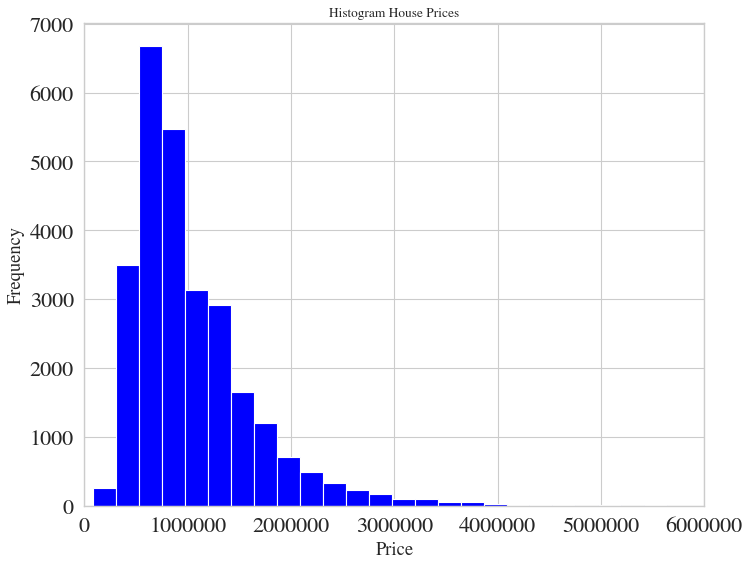

In [28]:

# Make a histogram of all the ratings in the Price column.
#print ("Skew is:", PriceArr.skew())
PriceArr = np.array(housing_data.na.drop(subset ='Price').select('Price').collect())
plt.hist(PriceArr,  bins = 50, color = 'Blue')
plt.ylabel ('Frequency')
plt.xlabel ('Price')
plt.xlim([0, 6000000])
plt.title ('Histogram House Prices')
plt.show()


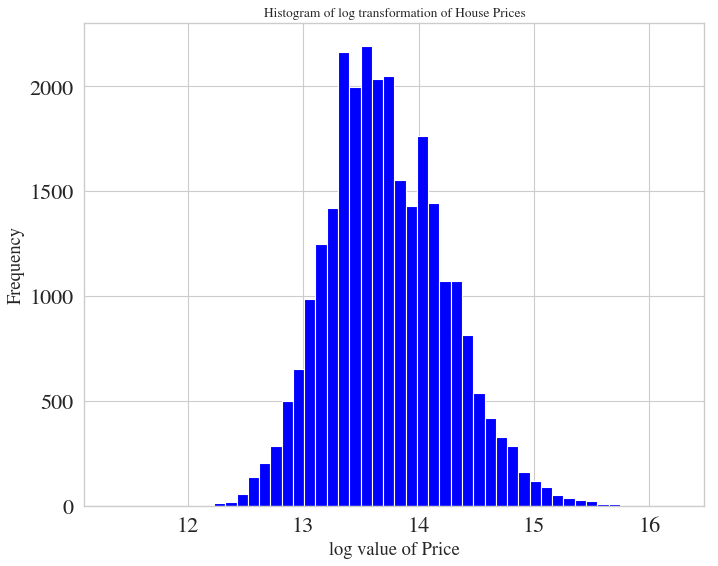

In [57]:

# Make a histogram of all the ratings in the Price column.
#print ("Skew is:", PriceArr.skew())

#housing_data = housing_data.withColumn('logPrice', F.log(housing_data.Price))

PriceArr = np.array(housing_data.na.drop(subset ='Price').select('Price').collect())
logPriceArr =np.log(PriceArr)
plt.hist(logPriceArr,  bins = 50, color = 'Blue')
plt.ylabel ('Frequency')
plt.xlabel ('log value of Price')
plt.title ('Histogram of log transformation of House Prices')
plt.show()


In [9]:
# Select a list of relevant columns. 
my_cols = housing_data.select([
 'Rooms',
'Suburb',
 'Type',
 'Price',
 'Method',
 'Distance',
 'Bedroom2',
 'Bathroom',
'Postcode',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount'])

In [10]:
# Dropping all the rows with null values
final_housing_data = my_cols.na.drop()

In [11]:
#housing_data = housing_data.dropDuplicates()
final_housing_data.count()

8834

In [22]:
# We can use the describe method to get some general statistics on our data. 
final_housing_data.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Rooms,8834,3.0970115462983925,0.9643164207193158,1,12
Suburb,8834,None,None,Abbotsford,Yarraville
Type,8834,None,None,h,u
Price,8834,1092517.6902875255,679198.4990818722,131000,9000000
Method,8834,None,None,PI,VB
Distance,8834,11.189019696626376,6.812473782620854,0.0,47.4
Bedroom2,8834,3.077880914647951,0.9641142833009112,1,12
Bathroom,8834,1.6460267149649084,0.7224407929983747,1,9
Postcode,8834,3111.549920760697,112.47067493813505,3000,3977


In [153]:
# Number of null values for each column

for item in final_housing_data.columns:
    nullCount=final_housing_data.where(F.col(item).isNull()).count()
    print("Number of null values for " + item + " = %g" % nullCount)

Number of null values for Rooms = 0
Number of null values for Suburb = 0
Number of null values for Type = 0
Number of null values for Price = 0
Number of null values for Method = 0
Number of null values for Distance = 0
Number of null values for Bedroom2 = 0
Number of null values for Bathroom = 0
Number of null values for Postcode = 0
Number of null values for Car = 0
Number of null values for Landsize = 0
Number of null values for BuildingArea = 0
Number of null values for YearBuilt = 0
Number of null values for CouncilArea = 0
Number of null values for Lattitude = 0
Number of null values for Longtitude = 0
Number of null values for Regionname = 0
Number of null values for Propertycount = 0


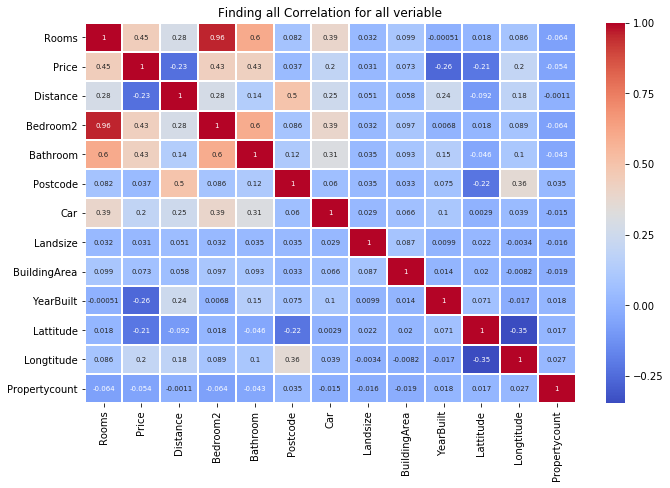

In [26]:
# checking correlation for all variables
plt.figure(figsize=(11,7))
sns.heatmap(final_housing_data.sample(False, 0.95).toPandas().corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 7})
plt.title('Finding all Correlation for all veriable')

print ("\n")

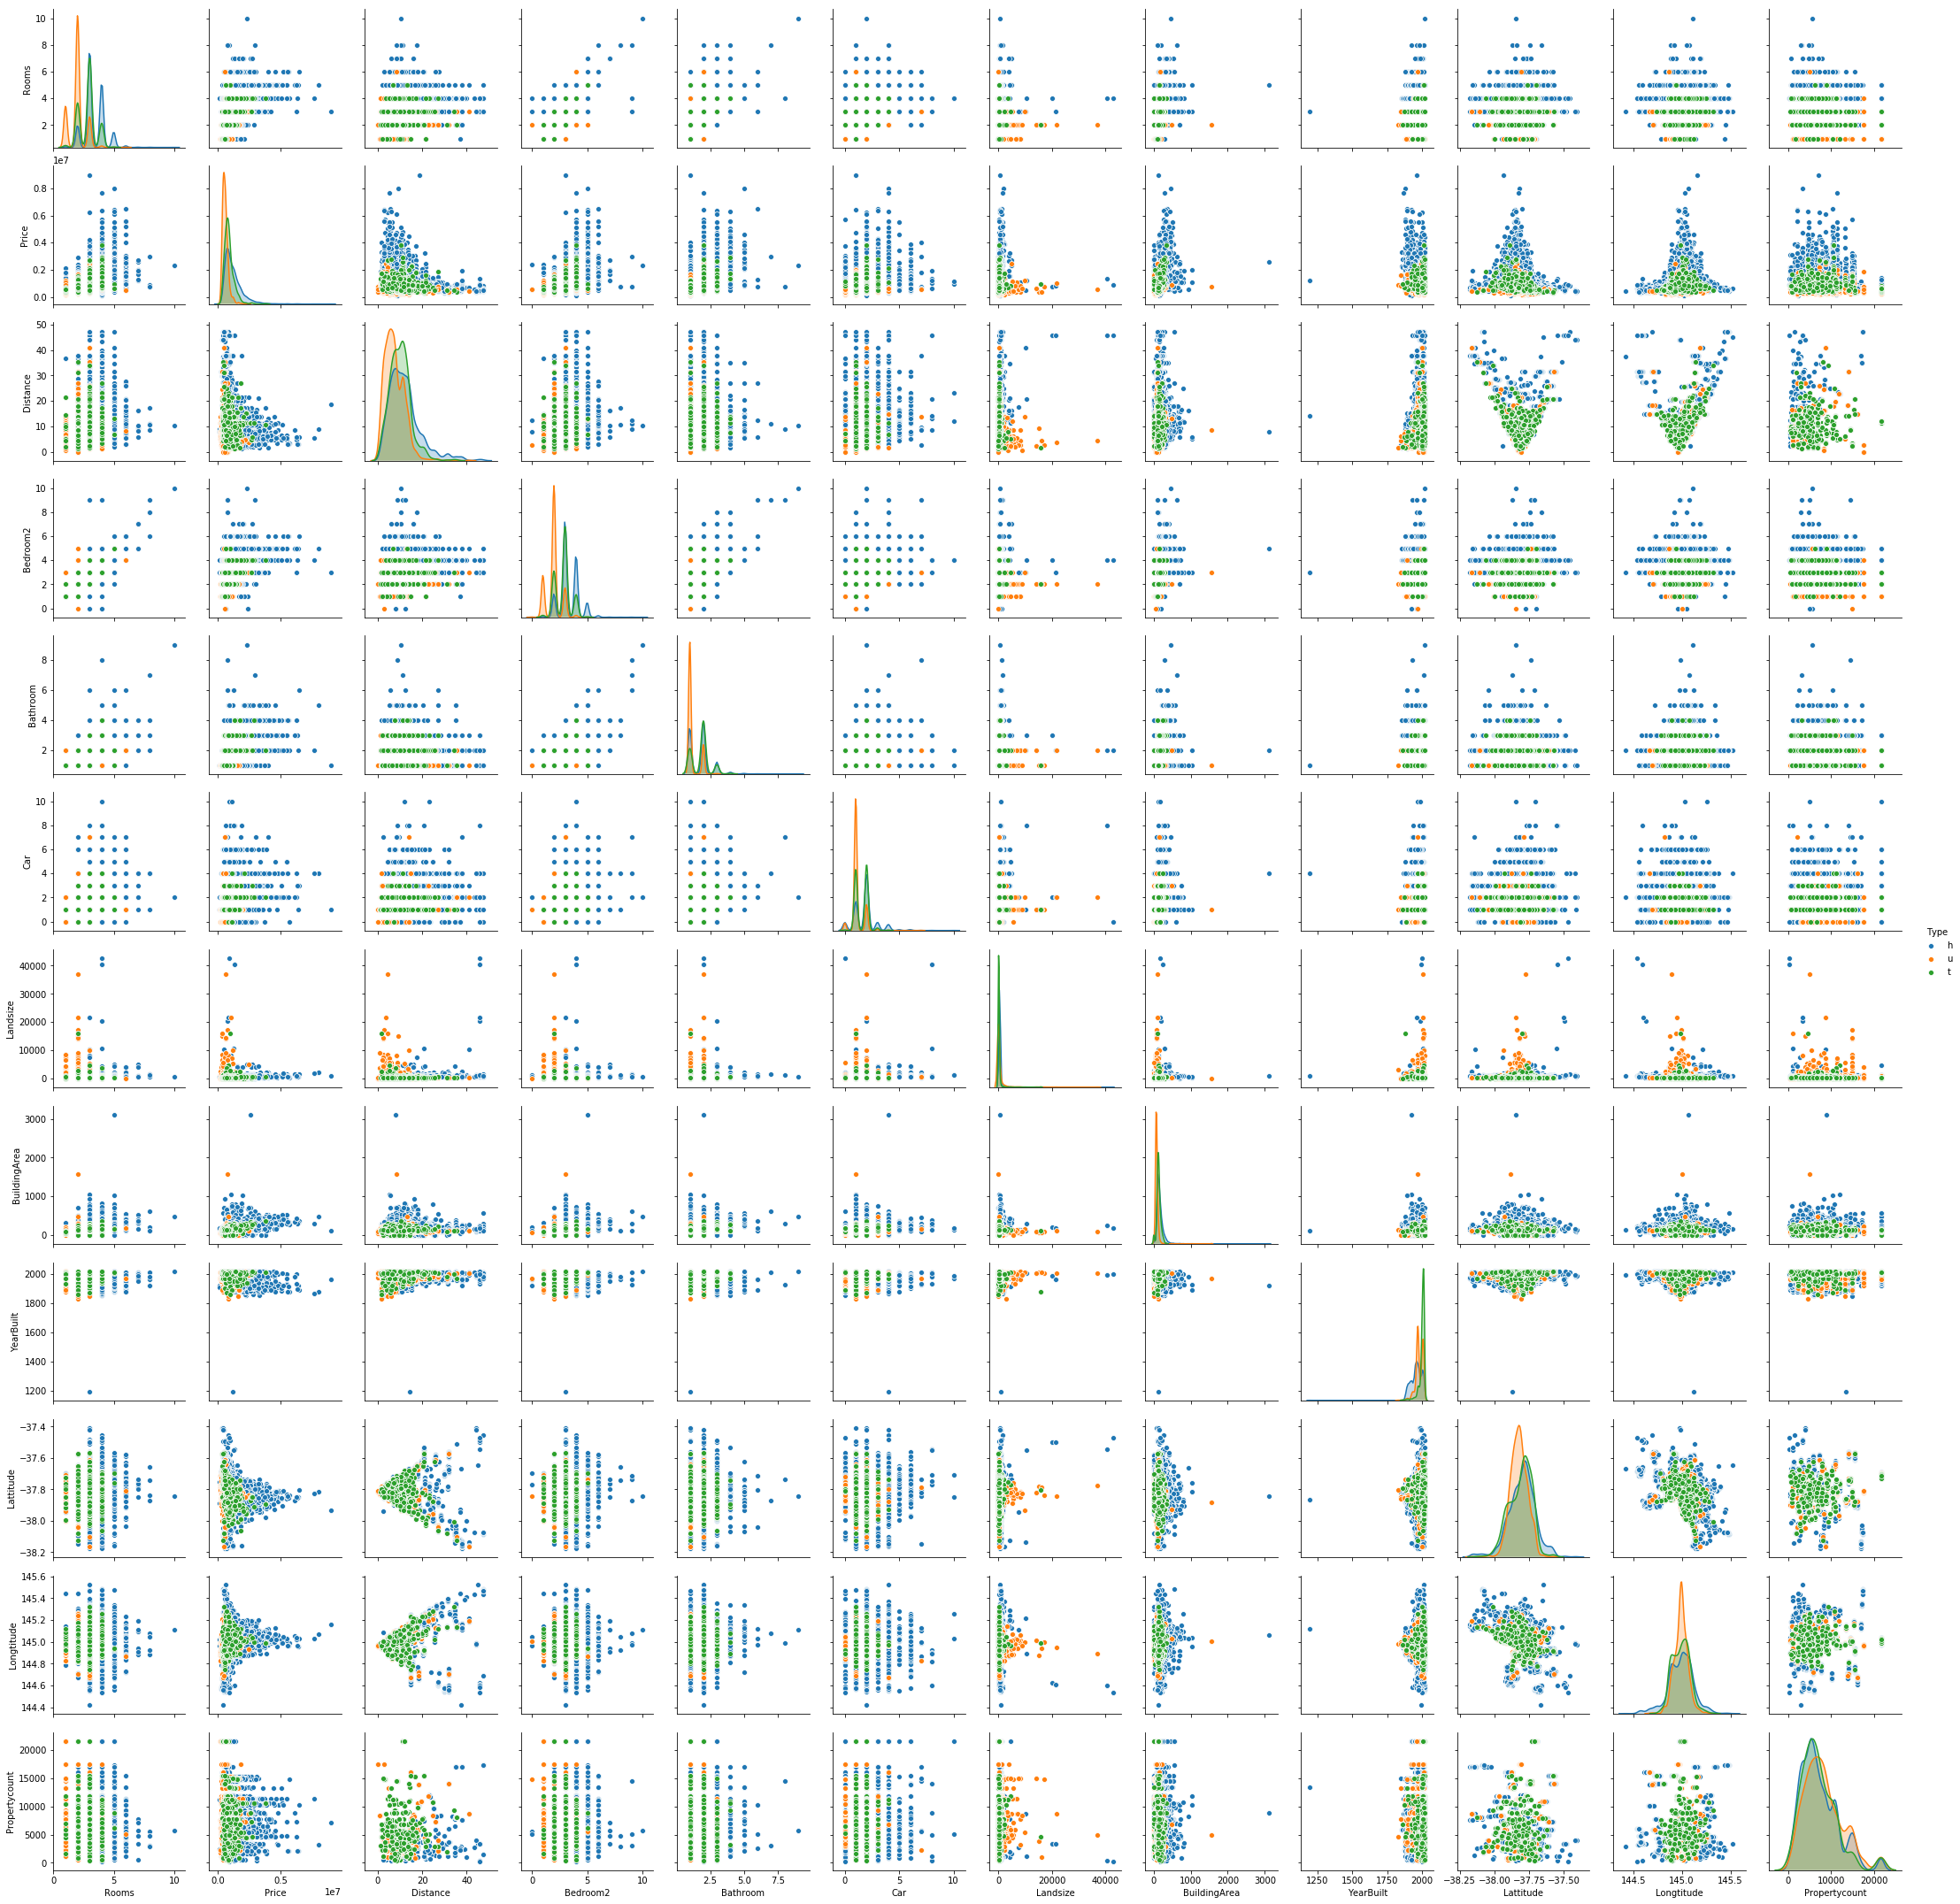

In [11]:
#pairplot of the variable according to Types
sns.pairplot(final_housing_data.sample(False, 0.95).toPandas(), hue= 'Type')


In [12]:
# Import VectorAssembler and Vectors
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,
                                OneHotEncoder,StringIndexer)

In [13]:
# First create a string indexer (convert every string into a number, such as male = 0 and female = 1).
# A number will be assigned to every category in the column.
type_indexer = StringIndexer(inputCol='Type',outputCol='TypeIndex').fit(final_housing_data)
final_housing_data= type_indexer.transform(final_housing_data)

# Now we can one hot encode these numbers. This converts the various outputs into a single vector.
# This makes it easier to process when you have multiple classes.
final_housing_data = OneHotEncoder(inputCol='TypeIndex',outputCol='TypeVec').transform(final_housing_data)

In [14]:
# First create a string indexer (convert every string into a number, such as male = 0 and female = 1).
# A number will be assigned to every category in the column.
region_indexer = StringIndexer(inputCol='Regionname',outputCol='RegionnameIndex').fit(final_housing_data)
final_housing_data= region_indexer.transform(final_housing_data)

# Now we can one hot encode these numbers. This converts the various outputs into a single vector.
# This makes it easier to process when you have multiple classes.
final_housing_data = OneHotEncoder(inputCol='RegionnameIndex',outputCol='RegionnameVec').transform(final_housing_data)

In [15]:
# First create a string indexer (convert every string into a number, such as male = 0 and female = 1).
# A number will be assigned to every category in the column.
method_indexer = StringIndexer(inputCol='Method',outputCol='MethodIndex').fit(final_housing_data)
final_housing_data= method_indexer.transform(final_housing_data)

# Now we can one hot encode these numbers. This converts the various outputs into a single vector.
# This makes it easier to process when you have multiple classes.
final_housing_data = OneHotEncoder(inputCol='MethodIndex',outputCol='MethodVec').transform(final_housing_data)

In [16]:
# First create a string indexer (convert every string into a number, such as male = 0 and female = 1).
# A number will be assigned to every category in the column.
council_indexer = StringIndexer(inputCol='CouncilArea',outputCol='CouncilAreaIndex').fit(final_housing_data)
final_housing_data= council_indexer.transform(final_housing_data)

# Now we can one hot encode these numbers. This converts the various outputs into a single vector.
# This makes it easier to process when you have multiple classes.
final_housing_data = OneHotEncoder(inputCol='CouncilAreaIndex',outputCol='CouncilAreaVec').transform(final_housing_data)

In [16]:
#https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/1779476228152266/1437143569842658/5673666086694627/latest.html

#https://blog.epigno.systems/2018/02/18/machine-learning-with-pyspark-linear-regression/
#https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a
#https://opensource.com/article/19/5/log-data-apache-spark


In [17]:
final_housing_data= final_housing_data.withColumn('logPrice', F.log('Price'))

final_housing_data.columns

['Rooms',
 'Suburb',
 'Type',
 'Price',
 'Method',
 'Distance',
 'Bedroom2',
 'Bathroom',
 'Postcode',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount',
 'TypeIndex',
 'TypeVec',
 'RegionnameIndex',
 'RegionnameVec',
 'MethodIndex',
 'MethodVec',
 'CouncilAreaIndex',
 'CouncilAreaVec',
 'logPrice']

In [49]:
# to view statistical information of the selected column(s)
final_housing_data.describe('logPrice').toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
logPrice,8834,13.753672575196674,0.5347744513275497,11.782952602183288,16.012735135300492


In [18]:
# The input columns are the feature columns names, and the output column is what you'd like the new column to be named. 
assembler = VectorAssembler(
    inputCols=[
     'Rooms',
     'TypeVec',
     'Distance',
    'MethodVec',
     'Bedroom2',
     'Bathroom',
     'Car',
     'Landsize',
    'CouncilAreaVec',
     'BuildingArea',
     'YearBuilt',     
     'Lattitude',
     'Longtitude',
     'RegionnameVec'],
    outputCol="features")

In [19]:
#randomly split data into training and test dataset
(train_data, test_data) = final_housing_data.randomSplit([0.7, 0.3], seed = 111)

In [20]:
#Linear Regression Starts from here


#lr_housing_data = assembler.transform(final_housing_data)

lr_train_data = assembler.transform(train_data)
lr_test_data = assembler.transform(test_data)



In [95]:
# Let's do a randomised 70/30 split. 
# Remember, you can use other splits depending on how easy/difficult it is to train your model.
#lr_train_data,lr_test_data = lr_housing_data.randomSplit([0.7,0.3])

In [21]:
# importing LinearRegression
from pyspark.ml.regression import LinearRegression

In [22]:
# These are the default values:
# featuresCol: What is the features column named? 
# labelCol: What is the label column named?
# predictionCol: What is the name of the actual prediction?

#lr = LinearRegression(featuresCol='features', labelCol='Price', predictionCol='prediction')

lr = LinearRegression(featuresCol='features', labelCol='logPrice', predictionCol='prediction')

In [23]:
# Fit/train the model. Fit the model onto the training data.
lrModel = lr.fit(lr_train_data)

In [35]:
# Print the coefficients and intercept for linear regression.
print("Coefficients: {} Intercept: {}".format(lrModel.coefficients,lrModel.intercept))

Coefficients: [0.10173434106573273,0.15282733434886983,-0.35136826497923046,-0.028631596731600734,0.029314553190566972,-0.007103029944922011,-0.060710599506231325,-0.04979260980900668,0.02067422449254741,0.088632685255276,0.035634659501545526,1.2245882542867934e-05,0.33559514650610384,0.10816427979382982,0.0718955109209272,0.037244310155016946,0.1138917718747343,-0.18048487277472353,0.19570120828687,-0.2321750947176836,0.015872809276310153,-0.007395995374215781,0.34314757096005477,0.19100566874746586,0.18426502813702644,0.11154024076846175,-0.10088291821317685,0.3098561081427341,0.11047998560948764,0.0655471309726116,0.08246248028597421,-0.4520257735642318,0.1449762776171161,-0.27596154458983735,-0.002068399222311255,-0.14846585734124326,-0.030189137633434934,-0.1202011058916795,-0.18564522178902082,-0.2502811430575256,0.10276613040525286,-0.08288437377857409,0.6003866954159431,0.31793772506427664,0.0011690068694824914,-0.002090510521999685,-1.1487639700323813,0.3616197008364765,-0.285

In [24]:
# Let's evaluate the model against the test data.
lr_test_results = lrModel.evaluate(lr_test_data)

In [50]:
# Interesting results! This shows the difference between the predicted value and the test data.
lr_test_results.residuals.show(10)

# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("Mean Absolute Error (mae) on test data: {}".format(lr_test_results.meanAbsoluteError))

# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("Mean Squared Error (mse) on test data: {}".format(lr_test_results.meanSquaredError))


# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("Root Mean Squared Error (rmse) on test data: {}".format(lr_test_results.rootMeanSquaredError))

# We can also get the R2 value. 
print("R Squared (R2) on test data: {}".format(lr_test_results.r2))


+--------------------+
|           residuals|
+--------------------+
|  0.5357165615773418|
| 0.03978731181775608|
| -0.6927832014606317|
| -0.3959404332692813|
|-0.00468934716893...|
|-0.14856721625126035|
| -0.6401160166948099|
|  -0.555494108565691|
|-0.30542894213200533|
|-0.11617964436077521|
+--------------------+
only showing top 10 rows

Mean Absolute Error (mae) on test data: 0.18574227119592024
Mean Squared Error (mse) on test data: 0.06607109697689947
Root Mean Squared Error (rmse) on test data: 0.2570429866323909
R Squared (R2) on test data: 0.7674210234120581


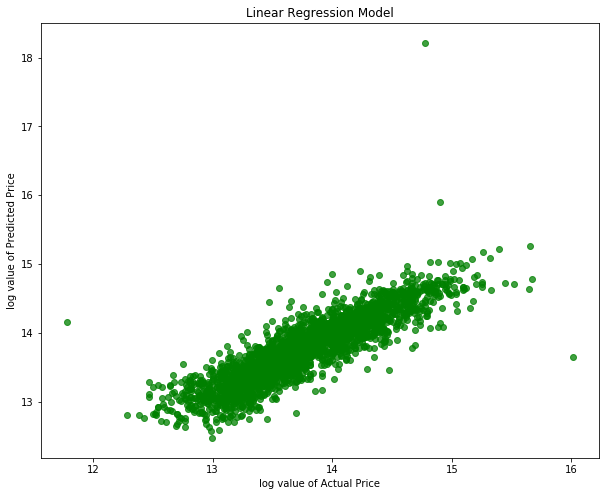

In [26]:
# view this relationship between predictions and actual_values graphically with a scatter plot.

lr_PriceArr = np.array(lr_test_results.predictions.select('logPrice').collect())
lr_PredictionArr = np.array(lr_test_results.predictions.select('Prediction').collect())

plt.figure(figsize=(10,8))
plt.scatter(lr_PriceArr,lr_PredictionArr, alpha=.75,
            color='g')  # alpha helps to show overlapping data
 
plt.xlabel('log value of Actual Price')
plt.ylabel('log value of Predicted Price')
plt.title('Linear Regression Model')

plt.show()


In [27]:
# Random forest Regression start from here
#importing Random Forest Regression
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.mllib.evaluation import RegressionMetrics
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder



In [28]:

# train RandomForest model
rf = RandomForestRegressor(labelCol="logPrice", featuresCol="features", predictionCol = "prediction")

rf_pipeline = Pipeline(stages=[assembler, rf])


In [29]:
#randomly split data into training and test dataset
#(rf_train_data, rf_test_data) = final_housing_data.randomSplit([0.7, 0.3], seed = 111)


rf_model = rf_pipeline.fit(train_data)

# Make predictions on test data
rf_test_results = rf_model.transform(test_data)

#rf_test_results.columns


In [30]:
# If we select the actual and predicted results, we can see that some predictions were correct while others were wrong.
rf_test_results.select('logPrice','prediction', 'features').show(10)


#Select (prediction, true label) and compute test error
#rf_evaluator = RegressionEvaluator(labelCol="logPrice", predictionCol="prediction",metricName="rmse")
#rmse = rf_evaluator.evaluate(rf_test_results)
#print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

#rf_evaluator = RegressionEvaluator(labelCol="logPrice", predictionCol="prediction",metricName="r2")
#r2 = rf_evaluator.evaluate(rf_test_results)
#print("Root Mean Squared Error (R2) on test data = %g" % r2)


rf_evaluator = RegressionEvaluator(labelCol = "logPrice")
print("Mean Absolute Error (mae) on test data = %g" %rf_evaluator.evaluate(rf_test_results,{rf_evaluator.metricName: "mae"}))

print("Mean Squared Error (mse) on test data = %g" %rf_evaluator.evaluate(rf_test_results,{rf_evaluator.metricName: "mse"}))

print("Root Mean Squared Error (rmse) on test data = %g" %rf_evaluator.evaluate(rf_test_results,{rf_evaluator.metricName: "rmse"}))

print("R Squared (R2) on test data = %g" %rf_evaluator.evaluate(rf_test_results,{rf_evaluator.metricName: "r2"}))



+------------------+------------------+--------------------+
|          logPrice|        prediction|            features|
+------------------+------------------+--------------------+
|  13.9108207377686|12.953419701496912|(55,[0,2,3,6,8,9,...|
|14.176675407175859| 14.09714673742621|(55,[0,1,3,5,8,9,...|
|12.542544882151386|12.835137699076778|(55,[0,2,3,6,8,9,...|
|12.911642346088676| 12.84148686456469|(55,[0,2,3,4,8,9,...|
|13.248114582709889|12.920452377967456|(55,[0,2,3,4,8,9,...|
|12.873902018105829|12.734937396956651|(55,[0,2,3,4,8,9,...|
|12.577636201962656|12.822552362007832|(55,[0,2,3,6,8,9,...|
|12.736700896592344| 12.86182508687076|(55,[0,2,3,7,8,9,...|
|12.515393893085436|12.796672056197796|(55,[0,2,3,6,8,9,...|
|12.821258284620408|12.799439407658515|(55,[0,2,3,4,8,9,...|
+------------------+------------------+--------------------+
only showing top 10 rows

Mean Absolute Error (mae) on test data = 0.194934
Mean Squared Error (mse) on test data = 0.0684609
Root Mean Squared Er

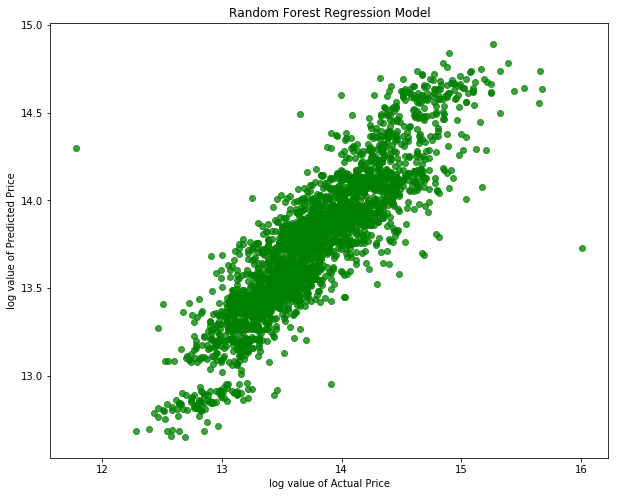

In [31]:
# view this relationship between predictions and actual_values graphically with a scatter plot.

rf_PriceArr = np.array(rf_test_results.select('logPrice').collect())
rf_PredictionArr = np.array(rf_test_results.select('Prediction').collect())

plt.figure(figsize=(10,8))
plt.scatter(rf_PriceArr,rf_PredictionArr, alpha=.75,
            color='g')  # alpha helps to show overlapping data
plt.xlabel('log value of Actual Price')
plt.ylabel('log value of Predicted Price')
plt.title('Random Forest Regression Model')

plt.show()

In [32]:
# Evaluate model
rf_cv_evaluator = RegressionEvaluator(metricName="rmse", labelCol=rf.getLabelCol(), predictionCol=rf.getPredictionCol())

# Create ParamGrid for Cross Validation
rf_paramGrid = (ParamGridBuilder()
             #.addGrid(rf.maxDepth, [2, 5, 10, 20, 30])
               .addGrid(rf.maxDepth, [2, 5])
             #.addGrid(rf.maxBins, [10, 20, 40, 80, 100])
               .addGrid(rf.maxBins, [10, 20, 40])
             #.addGrid(rf.numTrees, [5, 20, 50, 100, 500])
               .addGrid(rf.numTrees, [10, 100])
             .build())

# Create 5-fold CrossValidator
rf_cv = CrossValidator(estimator = rf,
                      estimatorParamMaps = rf_paramGrid,
                      evaluator = rf_cv_evaluator,
                      numFolds = 5)


In [33]:
rf_cv_pipeline = Pipeline(stages=[assembler, rf_cv])

rf_cv_pipelineModel = rf_cv_pipeline.fit(train_data)

In [34]:
# Use test set here so we can measure the accuracy of our model on new data

rf_cv_test_results = rf_cv_pipelineModel.transform(test_data)

In [35]:
# If we select the actual and predicted results, we can see that some predictions were correct while others were wrong.
rf_cv_test_results.select('logPrice','prediction', 'features').show(10)


#Select (prediction, true label) and compute test error
#rf_evaluator = RegressionEvaluator(labelCol="logPrice", predictionCol="prediction",metricName="rmse")
#rmse = rf_evaluator.evaluate(rf_test_results)
#print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

#rf_evaluator = RegressionEvaluator(labelCol="logPrice", predictionCol="prediction",metricName="r2")
#r2 = rf_evaluator.evaluate(rf_test_results)
#print("Root Mean Squared Error (R2) on test data = %g" % r2)


rf_evaluator = RegressionEvaluator(labelCol = "logPrice")
print("Mean Absolute Error (mae) on test data = %g" %rf_cv_evaluator.evaluate(rf_cv_test_results,{rf_cv_evaluator.metricName: "mae"}))

print("Mean Squared Error (mse) on test data = %g" %rf_cv_evaluator.evaluate(rf_cv_test_results,{rf_cv_evaluator.metricName: "mse"}))

print("Root Mean Squared Error (rmse) on test data = %g" %rf_cv_evaluator.evaluate(rf_cv_test_results,{rf_cv_evaluator.metricName: "rmse"}))

print("R Squared (R2) on test data = %g" %rf_cv_evaluator.evaluate(rf_cv_test_results,{rf_cv_evaluator.metricName: "r2"}))

+------------------+------------------+--------------------+
|          logPrice|        prediction|            features|
+------------------+------------------+--------------------+
|  13.9108207377686|12.965323827349012|(55,[0,2,3,6,8,9,...|
|14.176675407175859|14.040573090832325|(55,[0,1,3,5,8,9,...|
|12.542544882151386|   12.813466008864|(55,[0,2,3,6,8,9,...|
|12.911642346088676|12.873391491861193|(55,[0,2,3,4,8,9,...|
|13.248114582709889|12.902382947821586|(55,[0,2,3,4,8,9,...|
|12.873902018105829|12.760420633317812|(55,[0,2,3,4,8,9,...|
|12.577636201962656|12.788276070487573|(55,[0,2,3,6,8,9,...|
|12.736700896592344|12.897609663332819|(55,[0,2,3,7,8,9,...|
|12.515393893085436|12.796406329577229|(55,[0,2,3,6,8,9,...|
|12.821258284620408|12.811922652181885|(55,[0,2,3,4,8,9,...|
+------------------+------------------+--------------------+
only showing top 10 rows

Mean Absolute Error (mae) on test data = 0.192309
Mean Squared Error (mse) on test data = 0.0664821
Root Mean Squared Er

In [ ]:
#your_model = rf_model.bestModel.stages[1] # index of your RandomForestModel
#var_imp = your_model.featureImportances

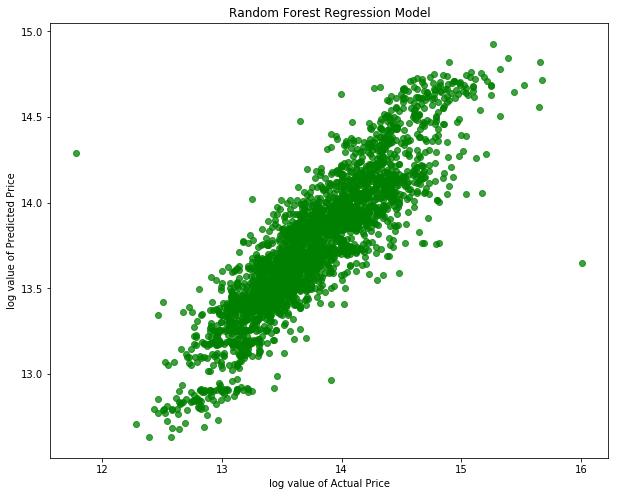

In [36]:
# view this relationship between predictions and actual_values graphically with a scatter plot.

rf_cv_PriceArr = np.array(rf_cv_test_results.select('logPrice').collect())
rf_cv_PredictionArr = np.array(rf_cv_test_results.select('Prediction').collect())

plt.figure(figsize=(10,8))
plt.scatter(rf_cv_PriceArr,rf_cv_PredictionArr, alpha=.75,
            color='g')  # alpha helps to show overlapping data
plt.xlabel('log value of Actual Price')
plt.ylabel('log value of Predicted Price')
plt.title('Random Forest Regression Model')

plt.show()

In [37]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.mllib.evaluation import RegressionMetrics
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [38]:

# train RandomForest model
gbr = GBTRegressor(labelCol="logPrice", featuresCol="features", predictionCol = "prediction")

gbr_pipeline = Pipeline(stages=[assembler, gbr])

In [39]:
#randomly split data into training and test dataset
#(gbr_train_data, gbr_test_data) = final_housing_data.randomSplit([0.7, 0.3], seed = 111)


gbr_model = gbr_pipeline.fit(train_data)

# Make predictions on test data
gbr_test_results = gbr_model.transform(test_data)



In [40]:
# If we select the actual and predicted results, we can see that some predictions were correct while others were wrong.
gbr_test_results.select('logPrice','prediction', 'features').show(10)

# Select (prediction, true label) and compute test error
#gbr_evaluator = RegressionEvaluator(labelCol="logPrice", predictionCol="prediction",metricName="rmse")
#rmse = gbr_evaluator.evaluate(gbr_test_results)
#print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

gbr_evaluator = RegressionEvaluator(labelCol = "logPrice")
print("Mean Absolute Error (mae) on test data = %g" %gbr_evaluator.evaluate(gbr_test_results,{gbr_evaluator.metricName: "mae"}))

print("Mean Squared Error (mse) on test data = %g" %gbr_evaluator.evaluate(gbr_test_results,{gbr_evaluator.metricName: "mse"}))

print("Root Mean Squared Error (rmse) on test data = %g" %gbr_evaluator.evaluate(gbr_test_results,{gbr_evaluator.metricName: "rmse"}))

print("R Squared (R2) on test data = %g" %gbr_evaluator.evaluate(gbr_test_results,{gbr_evaluator.metricName: "r2"}))


+------------------+------------------+--------------------+
|          logPrice|        prediction|            features|
+------------------+------------------+--------------------+
|  13.9108207377686|12.552304920221877|(55,[0,2,3,6,8,9,...|
|14.176675407175859|14.073567502933225|(55,[0,1,3,5,8,9,...|
|12.542544882151386|12.841112567906945|(55,[0,2,3,6,8,9,...|
|12.911642346088676|  12.8787083827279|(55,[0,2,3,4,8,9,...|
|13.248114582709889|12.919224262484823|(55,[0,2,3,4,8,9,...|
|12.873902018105829| 12.49054849994046|(55,[0,2,3,4,8,9,...|
|12.577636201962656|12.780820995494336|(55,[0,2,3,6,8,9,...|
|12.736700896592344|12.906358796223172|(55,[0,2,3,7,8,9,...|
|12.515393893085436|12.719424488655822|(55,[0,2,3,6,8,9,...|
|12.821258284620408|12.797134150876744|(55,[0,2,3,4,8,9,...|
+------------------+------------------+--------------------+
only showing top 10 rows

Mean Absolute Error (mae) on test data = 0.171146
Mean Squared Error (mse) on test data = 0.0535094
Root Mean Squared Er

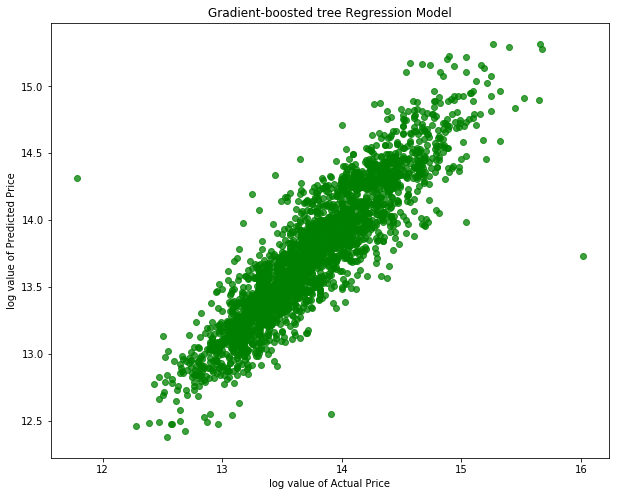

In [41]:
# view this relationship between predictions and actual_values graphically with a scatter plot.

gbr_PriceArr = np.array(gbr_test_results.select('logPrice').collect())
gbr_PredictionArr = np.array(gbr_test_results.select('Prediction').collect())

plt.figure(figsize=(10,8))
plt.scatter(gbr_PriceArr,gbr_PredictionArr, alpha=.75,
            color='g')  # alpha helps to show overlapping data
plt.xlabel('log value of Actual Price')
plt.ylabel('log value of Predicted Price')
plt.title('Gradient-boosted tree Regression Model')

plt.show()

In [43]:
# Define a grid of hyperparameters to test:
#  - maxDepth: max depth of each decision tree in the GBT ensemble
#  - maxIter: iterations, i.e., number of trees in each GBT ensemble
# In this example notebook, we keep these values small.
#In practice, to get the highest accuracy, we would likely want to try deeper trees (10 or higher) and more trees in the ensemble (>100).
gbr_paramGrid = ParamGridBuilder()\
  .addGrid(gbr.maxDepth, [2, 5])\
  .addGrid(gbr.maxIter, [10, 100])\
  .build()
# We define an evaluation metric.  This tells CrossValidator how well we are doing by comparing the true labels with predictions.
gbr_cv_evaluator = RegressionEvaluator(metricName="rmse", labelCol=gbr.getLabelCol(), predictionCol=gbr.getPredictionCol())
# Declare the CrossValidator, which runs model tuning for us.
gbr_cv = CrossValidator(estimator=gbr, evaluator=gbr_cv_evaluator, estimatorParamMaps=gbr_paramGrid)

In [44]:
gbr_cv_pipeline = Pipeline(stages=[assembler, gbr_cv])

In [45]:
#https://docs.azuredatabricks.net/_static/notebooks/gbt-regression.html

gbr_cv_pipelineModel = gbr_cv_pipeline.fit(train_data)
gbr_cv_test_results = gbr_cv_pipelineModel.transform(test_data)

In [46]:
# If we select the actual and predicted results, we can see that some predictions were correct while others were wrong.
gbr_cv_test_results.select('logPrice','prediction', 'features').show(10)

# Select (prediction, true label) and compute test error
#gbr_evaluator = RegressionEvaluator(labelCol="logPrice", predictionCol="prediction",metricName="rmse")
#rmse = gbr_evaluator.evaluate(gbr_test_results)
#print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

evaluator = RegressionEvaluator(labelCol = "logPrice")
print("Mean Absolute Error (mae) on test data = %g" %gbr_cv_evaluator.evaluate(gbr_cv_test_results,{gbr_cv_evaluator.metricName: "mae"}))

print("Mean Squared Error (mse) on test data = %g" %gbr_cv_evaluator.evaluate(gbr_cv_test_results,{gbr_cv_evaluator.metricName: "mse"}))

print("Root Mean Squared Error (rmse) on test data = %g" %gbr_cv_evaluator.evaluate(gbr_cv_test_results,{gbr_cv_evaluator.metricName: "rmse"}))

print("R Squared (R2) on test data = %g" %gbr_cv_evaluator.evaluate(gbr_cv_test_results,{gbr_cv_evaluator.metricName: "r2"}))

+------------------+------------------+--------------------+
|          logPrice|        prediction|            features|
+------------------+------------------+--------------------+
|  13.9108207377686|12.655237492085146|(55,[0,2,3,6,8,9,...|
|14.176675407175859| 14.11640429969679|(55,[0,1,3,5,8,9,...|
|12.542544882151386|12.891531456413478|(55,[0,2,3,6,8,9,...|
|12.911642346088676|12.777876194668522|(55,[0,2,3,4,8,9,...|
|13.248114582709889|13.081354069183165|(55,[0,2,3,4,8,9,...|
|12.873902018105829| 12.56558929260637|(55,[0,2,3,4,8,9,...|
|12.577636201962656| 12.82618648833387|(55,[0,2,3,6,8,9,...|
|12.736700896592344|12.823678108202447|(55,[0,2,3,7,8,9,...|
|12.515393893085436|12.619795809381971|(55,[0,2,3,6,8,9,...|
|12.821258284620408|12.760000170410294|(55,[0,2,3,4,8,9,...|
+------------------+------------------+--------------------+
only showing top 10 rows

Mean Absolute Error (mae) on test data = 0.145166
Mean Squared Error (mse) on test data = 0.0397776
Root Mean Squared Er

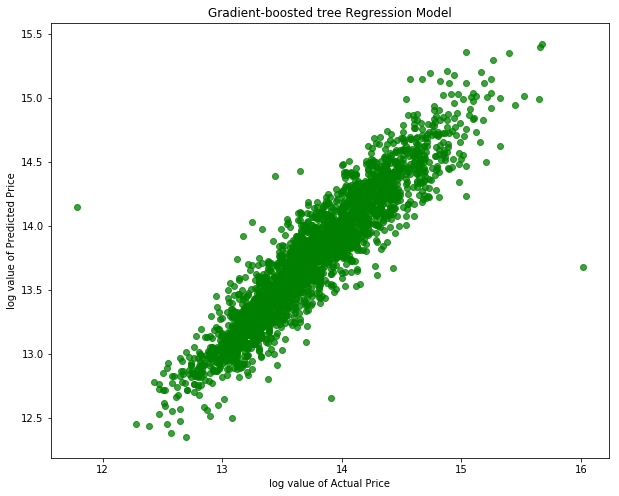

In [47]:
# view this relationship between predictions and actual_values graphically with a scatter plot.

gbr_cv_PriceArr = np.array(gbr_cv_test_results.select('logPrice').collect())
gbr_cv_PredictionArr = np.array(gbr_cv_test_results.select('Prediction').collect())

plt.figure(figsize=(10,8))
plt.scatter(gbr_cv_PriceArr,gbr_cv_PredictionArr, alpha=.75,
            color='g')  # alpha helps to show overlapping data
plt.xlabel('log value of Actual Price')
plt.ylabel('log value of Predicted Price')
plt.title('Gradient-boosted tree Regression Model')

plt.show()